# Lab-1

# Question-1

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
from mpl_toolkits import mplot3d

In [75]:
theta = np.arange(-10,10+0.1, 0.1)
A=[0.01, 0.01]
B=[2, 3]
A<=B
random.randint(0,1)

0

In [76]:
L_theta = np.square(theta)

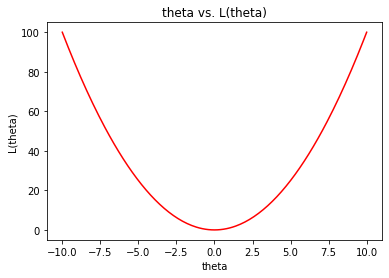

In [77]:
plt.plot(theta,L_theta, 'r')
plt.xlabel('theta')
plt.ylabel('L(theta)')
plt.title("theta vs. L(theta)")
plt.show()

### Minimum at theta=0



# Question-2

In [78]:
theta_1 = np.arange(-10, 10, 0.1)
theta_2 = np.arange(-10, 10, 0.1)


theta1, theta2 = np.meshgrid(theta_1, theta_2)


L_theta = np.zeros(shape = (len(theta_1), len(theta_2)))


for i in range(0, len(theta_1)):
    for j in range(0, len(theta_2)):
        L_theta[i][j]= theta_1[i]**2 + theta_2[j]**2

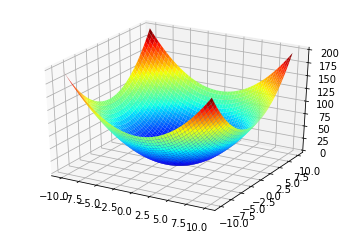

In [79]:
ax=plt.axes(projection='3d')

surf = ax.plot_surface(theta1, theta2, L_theta, cmap=cm.jet)

# Question-3

In [80]:
df = pd.read_csv('data_for_Problem1.csv')


In [81]:
X = df['x']
Y = df['y']

X=X.to_numpy()
Y=Y.to_numpy()

In [82]:
theta0 = np.arange(-30, 30+0.1, 1)
theta1 = np.arange(-10, 10+0.1, 1)
L = np.zeros((len(theta0), len(theta1)))
m = len(X)

In [83]:
X = (X - np.mean(X))/np.std(X)


In [84]:
for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        for k in range(0, m):
            L[i, j] = L[i, j] + (Y[k] - (t0 + t1*X[k]))**2

T0, T1 = np.meshgrid(theta0, theta1)            


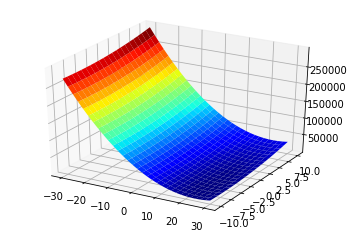

In [85]:
ax=plt.axes(projection='3d')

surf = ax.plot_surface(T0, T1, L.T, cmap=cm.jet)

# Question-4

In [86]:
l=len(X)
X0 = np.ones(shape=l)
X0=X0.reshape(l, 1)
X=X.reshape(l, 1)
Y=Y.reshape(l, 1)

In [87]:
K=np.hstack((X0, X))

In [88]:
pseudo = K.T.dot(K)
pseudo_inv = np.linalg.pinv(pseudo)

In [89]:
theta_ans = pseudo_inv.dot(K.T).dot(Y)

In [90]:
theta_ans

array([[23.71808511],
       [-6.86699545]])

# Question-5

In [91]:
random_val = np.random.rand(2, 1)

In [92]:
np.sum((Y - K.dot(random_val))**2)

55969.12166522383

In [93]:
np.sum((Y - K.dot(theta_ans))**2)

1572.650366892292

##### The value of cost function for any value will always be greater than that of the cost function value corresponding to theta_ans

# Lab 2

# Question-1 a

In [94]:
theta_l1 = np.random.randn(1)

In [95]:
alpha = 0.1

In [96]:
alpha = 0.01

In [97]:
for i in range(1, 1000):
    theta_l1 =  theta_l1 - alpha*2*theta_l1
theta_l1    

array([4.30220338e-10])

# 1-b

In [98]:
theta_l2 = np.random.randn(2)

In [99]:
for i in range(1, 1000):
    theta_l2[1] = theta_l2[1] - alpha*2*theta_l2[1]
    theta_l2[0] = theta_l2[0] - alpha*2*theta_l2[0]
theta_l2    

array([4.81929180e-10, 5.34028064e-10])

# 1-c

In [100]:
theta_l3 = np.random.randn(1)

In [101]:
for i in range(1, 1000):
    theta_l3 = theta_l3 - 2*alpha*(theta_l3 - 1)
theta_l3[0]

0.999999995663127

# 1-d

In [102]:
theta_l4 = np.random.randn(2)

In [103]:
for i in range(1, 1000):
    theta_l4[0] = theta_l4[0] - 4*alpha*(theta_l4[0] - 1)
    theta_l4[1] = theta_l4[1] - 4*alpha*(theta_l4[1] - 1)
    
print(theta_l4[0])
print(theta_l4[1])

0.9999999999999987
0.9999999999999987


# 1-e

In [104]:
alpha=0.1
theta_l5 = np.random.randn(2, 1)

m=df.shape[0]

X_inc = df['x'].to_numpy().reshape(1, m)

X_inc = (X_inc - np.mean(X_inc))/np.std(X_inc)

Y = df['y'].to_numpy().reshape(m, 1)

X0 = np.ones(X_inc.shape).reshape(1, m)

X = np.append(X0, X_inc, axis=0)
X = X.T


In [105]:
for i in range(1, 100000):
    theta_l5 = theta_l5 - alpha*(-1/m)*X.T.dot(Y- X.dot(theta_l5))
    
theta_l5    

array([[23.71808511],
       [-6.86699545]])

# Question-2

In [106]:
theta_sgd=np.random.randn(2, 1)

for i in range(1, 10000):
    rand_index = np.random.randint(1, m)
    X_i = X[rand_index].reshape(1, 2)
    Y_i = Y[rand_index].reshape(1)
    theta_sgd = theta_sgd - alpha*(-1/m)*X_i.T.dot(Y_i - X_i.dot(theta_sgd))
    
    
theta_sgd    

array([[23.67410051],
       [-6.83394682]])

# Question-3

In [107]:
def J(X, Y, theta):
  cost = np.sum(np.square(Y-(X.dot(theta))))
  return cost

In [108]:
def delta_J(X, Y, theta):
  prediction = np.dot(X,theta)
  return X.T.dot((prediction-Y))

In [109]:
import sympy
from sympy import Symbol




def steepest_descent(X, Y, theta, lrate=0.01, n_iter=1000):
  
  m = len(Y)
  Y = Y.to_numpy().reshape(m,1)
  
  
  alpha = Symbol('alpha')
  phi = J(X, Y, theta - alpha*delta_J(X,Y,theta))
  
  old_a = np.random.randn()
  
  for it in range(n_iter):
    
    diff_phi = phi.diff(alpha) # J(alpha) = phi
    new_a = old_a - (diff_phi.subs(alpha, old_a)/diff_phi.diff(alpha).subs(alpha, old_a))
    prediction = np.dot(X, theta)
    theta = theta - new_a*(X.T.dot(prediction - Y))
    
    old_a = new_a
  
  return theta

In [110]:
df = pd.read_csv('data_for_Problem1.csv')
X = df.x
Y = df.y

X = (X-np.mean(X))/np.std(X)

n_iterations = 1000;
lrate = 0.01

theta = np.random.rand(2,1)*100
#print(theta)
X_b = np.c_[np.ones((len(X),1)), X]
theta = steepest_descent(X_b, Y, theta, lrate, n_iterations)

print(theta)

[[23.7180851063830]
 [-6.86699544725538]]


In [111]:
def L(theta):
  return theta**2



alpha = Symbol('alpha')
theta = Symbol('theta')


#L = theta**2

delta_L = L(theta).diff(theta)
n_iter = 1000

t0 = np.random.randn()*100
old_a = np.random.randn()

phi = L(t0-alpha*delta_L.subs(theta, t0))

for it in range(n_iter):
  diff_phi = phi.diff(alpha)
  new_a = old_a - (diff_phi.subs(alpha, old_a)/diff_phi.diff(alpha).subs(alpha, old_a))
  t0 = t0 - new_a*delta_L.subs(theta, t0)
  old_a = new_a
 

print(t0, new_a)

0 0.500000000000000


In [112]:
def L1(theta1, theta2):
  return theta1**2 + theta2**2


alpha = Symbol('alpha')
theta1 = Symbol('theta1')
theta2 = Symbol('theta2')
#L = theta**2
delta_L1 = L1(theta1, theta2).diff(theta1)
delta_L2 = L1(theta1, theta2).diff(theta2)
n_iter = 1000

t0 = np.random.randn()*100
t1 = np.random.randn()*100
old_a = np.random.randn()

phi_0 = L1(t0 - alpha*delta_L1.subs(theta1, t0), t1)
phi_1 = L1(t0, t1 - alpha*delta_L2.subs(theta2, t1))

for it in range(n_iter):
  diff_phi = phi_0.diff(alpha)
  new_a = old_a - (diff_phi.subs(alpha, old_a)/diff_phi.diff(alpha).subs(alpha, old_a))
  t0 = t0 - new_a*delta_L1.subs(theta1, t0)
  t1 = t1 - new_a*delta_L2.subs(theta2, t1)
  old_a = new_a
 
print(t0, t1, new_a)

0 0 0.500000000000000


# LAB 3

# Question 1

In [3]:
df = pd.read_csv('ex2data1-logistic.csv')
df_2 = pd.read_csv('ex2data2-logistic.csv')

In [4]:
import seaborn as sns

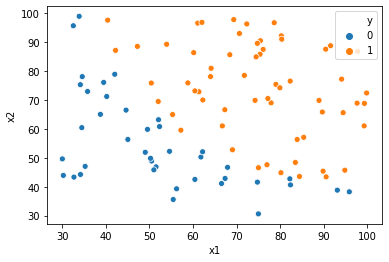

In [5]:
sns.scatterplot(x='x1',y='x2',hue='y',data=df)

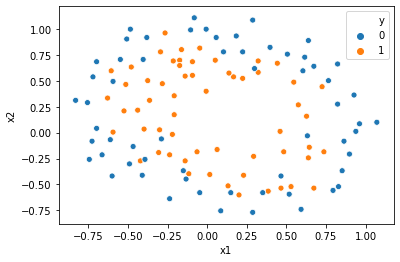

In [6]:
sns.scatterplot(x='x1',y='x2',hue='y',data=df_2)

# Question-2

# Dataset-1

In [7]:
def sigmoid(x):
  return 1.0 / (1 + np.exp(-x))

In [8]:
m=df.shape[0]

p_df = df

p_df['x1'] = (p_df['x1'] - p_df['x1'].mean())/p_df['x1'].std()
p_df['x2'] = (p_df['x2'] - p_df['x2'].mean())/p_df['x2'].std()


X_1 = df['x1'].to_numpy().reshape(1, m)
X_1 = (X_1 - np.mean(X_1))/np.std(X_1)

X_2 = df['x2'].to_numpy().reshape(1, m)
X_2 = (X_2 - np.mean(X_2))/np.std(X_2)

Y = df['y'].to_numpy().reshape(m, 1)

X0 = np.ones(X_1.shape).reshape(1, m)

X = np.append(X_1, X_2, axis=0)
X = np.append(X0, X, axis=0)

X = X.T
m = X.shape[0]

In [9]:
from sklearn.model_selection import train_test_split as t
X, X_test, Y, Y_test = t(X, Y, test_size=0.1)

In [10]:
theta = np.random.randn(3,1)

In [11]:
def h_t(X, theta):
    h_theta = X.dot(theta)
    return h_theta

In [12]:
alpha = 0.01
precision = 0.00001
i=0
diff = np.ones(theta.shape)
while (np.all(diff)>precision):
    previous = theta
    theta = theta + alpha*X.T.dot(Y-sigmoid(h_t(X, theta)))
    diff = abs(previous-theta)
    i+=1
print(theta)
print("No. of iterations : ", i)

[[1.57259194]
 [3.87080965]
 [3.54340395]]
No. of iterations :  5144


In [13]:
theta = theta.T

## Decision boundary

In [22]:
x_val = np.linspace(-2, 2, 50)
x_val = (theta[0][1])*x_val
y_val = -((theta[0][0]) + x_val)/(theta[0][2])

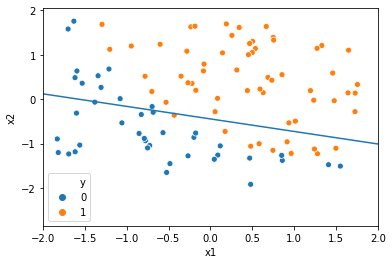

In [23]:
plt.plot(x_val, y_val)
plt.xlim([-2, 2])
sns.scatterplot(x='x1',y='x2',hue='y',data=df)

## Accuracy

In [29]:
def accuracy(X, Y):
    predict = (sigmoid(h_t(X, theta.T)) >= 0.5).astype(int)
    a = np.mean(predict == Y)
    return a * 100

print("Test accuracy : ", accuracy(X_test, Y_test))
print("Train accuracy : ", accuracy(X, Y))


Test accuracy :  90.0
Train accuracy :  91.11111111111111


In [30]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score as asc

m = lr(solver='liblinear')
m.fit(X, Y.ravel())
predict = m.predict(X)

accuracy = asc(Y.flatten(),predict)
theta = m.coef_

accuracy*100

91.11111111111111

# Dataset-2

In [44]:
m=df_2.shape[0]

X_1 = df_2['x1'].to_numpy().reshape(1, m)

X_3 = X_1**2

X_2 = df_2['x2'].to_numpy().reshape(1, m)

X_4 = X_2**2

Y = df_2['y'].to_numpy().reshape(m, 1)

X0 = np.ones(X_1.shape).reshape(1, m)

X = np.append(X_1, X_2, axis=0)
X = np.append(X0, X, axis=0)
X = np.append(X, X_3, axis=0)
X = np.append(X, X_4, axis=0)


X = X.T
m = X.shape[0]


theta = np.random.randn(5,1)



from sklearn.model_selection import train_test_split as t
X, X_test, Y, Y_test = t(X, Y, test_size=0.1)

In [45]:
alpha = 0.01
precision = 0.00001
i=0
diff = np.ones(theta.shape)
while (np.all(diff)>precision):
    previous = theta
    theta = theta + alpha*X.T.dot(Y-sigmoid(h_t(X, theta)))
    diff = abs(previous-theta)
    i+=1
print(theta)
print("No. of iterations : ", i)

[[ 3.64626378]
 [ 1.1593613 ]
 [ 1.94276262]
 [-8.06626331]
 [-7.19026539]]
No. of iterations :  14599


## Accuracy

In [46]:
def accuracy(X, Y):
    predict = (sigmoid(h_t(X, theta)) >= 0.5).astype(int)
    a = np.mean(predict == Y)
    return a * 100

print("Test accuracy : ", accuracy(X_test, Y_test))
print("Train accuracy : ", accuracy(X, Y))


Test accuracy :  91.66666666666666
Train accuracy :  78.30188679245283


## Decision Boundary

In [301]:
def mapFeature(X_1, X_2, degree):
    res = np.ones(X_1.shape[0])
    for i in range(1,degree+1):
        for j in range(0,i+1):
            if(i!=2 or j!=1):
                res = np.column_stack((res, (X_1 ** (i-j)) * (X_2 ** j)))
    
    return res

In [302]:
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1.5, 1.5, 50)
    v = np.linspace(-1.5, 1.5, 50)
    U,V = np.meshgrid(u,v)
    
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "inferno")
    
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs



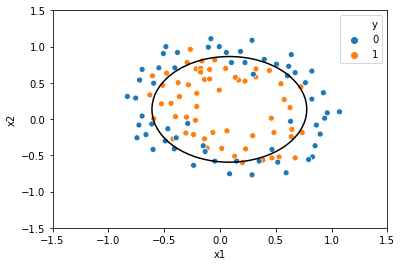

In [303]:
fig, axes = plt.subplots();
plotDecisionBoundary(theta, 2, axes)
sns.scatterplot(x='x1',y='x2',hue='y',data=df_2)

# LAB 4

In [4]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import multivariate_normal

# Question-1

## Binary Classification

In [5]:
data = load_digits().data
labels = load_digits().target

data = StandardScaler().fit_transform(data)

In [6]:
index = np.where((labels == 0) | (labels == 1))[0]
X = data[index, :]
Y = labels[index]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9) 


id0 = np.where(Y_train == 0)[0]
id1 = np.where(Y_train == 1)[0]


x = [X_train[id0, :], X_train[id1, :]]
y = [Y_train[id0], Y_train[id1]]



In [7]:
covariance = (np.cov(x[0].T) + np.cov(x[1].T))/2

mean = [np.mean(x[0], axis=0), np.mean(x[1], axis=0)]

prior = np.array([len(y[0]), len(y[1])])/(len(y[0]) + len(y[1]))

cov_inv = np.linalg.pinv(covariance)


In [8]:
beta = cov_inv@(mean[1]-mean[0])
b = 0.5*(mean[0].T@cov_inv@mean[0] - mean[1].T@cov_inv@mean[1]) + np.log(prior[1]/prior[0])

In [9]:
prediction = np.where(X_test@beta + b>0, 1, 0)
print("predicted : ", prediction)
print("actual    : ", Y_test)

predicted :  [0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1]
actual    :  [0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1]


In [10]:
accuracy = (prediction == Y_test)
print("Accuracy is : ", np.sum(accuracy)/len(accuracy)*100)

Accuracy is :  100.0


## Multiclass Classification

In [21]:
X = data
Y = labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9) 
k = np.unique(labels).shape[0]
pxl = X.shape[1]
prior = np.zeros([k, 1])
sigma = np.zeros([pxl, pxl])
mean = np.zeros([k, pxl])
samples = X_train.shape[0]


for i in range(k):
    prior[i] = len(np.where(Y_train == i)[0])/samples
    sigma += np.cov(X_train[np.where(Y_train == i)[0]].T)
    mean[i] = np.mean(X_train[np.where(Y_train == i)[0]], axis=0)
    
sigma /= k
cov_inv = np.linalg.pinv(sigma)

In [22]:
def classify(x):
    estimator = np.zeros([k, 1])
    for i in range(k):
        estimator[i] = -0.5*(x-mean[i]).T@cov_inv@(x-mean[i]) + np.log(prior[i])
    return np.argmax(estimator)    

In [23]:
predicted = np.zeros(Y_test.shape)
for i in range(Y_test.shape[0]):
    predicted[i] = classify(X_test[i])

In [24]:
accuracy = np.sum(predicted == Y_test)/len(Y_test)

In [25]:
print("Accuracy is : ", accuracy*100)

Accuracy is :  97.77777777777777


# Question-2

In [31]:
X = data
Y = labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9) 
k = np.unique(labels).shape[0]
pxl = X.shape[1]
prior = np.zeros([k, 1])
sigma = np.zeros([k, pxl, pxl])
mean = np.zeros([k, pxl])
samples = X_train.shape[0]
cov_inv = np.zeros([k, pxl, pxl])

for i in range(k):
    prior[i] = len(np.where(Y_train == i)[0])/samples
    sigma[i] = np.cov(X_train[np.where(Y_train == i)[0]].T)
    cov_inv[i] = np.linalg.pinv(sigma[i])
    mean[i] = np.mean(X_train[np.where(Y_train == i)[0]], axis=0)
  

In [32]:
def classify(x):
    estimator = np.zeros([k, 1])
    for i in range(k):
        estimator[i] = -0.5*(x-mean[i]).T@cov_inv[i]@(x-mean[i]) + np.log(prior[i])
    return np.argmax(estimator)    

In [33]:
predicted = np.zeros(Y_test.shape)
for i in range(Y_test.shape[0]):
    predicted[i] = classify(X_test[i])

In [34]:
accuracy = np.sum(predicted == Y_test)/len(Y_test)
# print(Y_test)
# print(predicted)

In [35]:
print("Accuracy is : ", accuracy*100)

Accuracy is :  95.0


# LAB 5

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

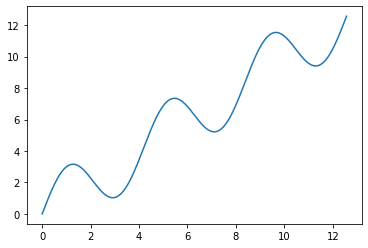

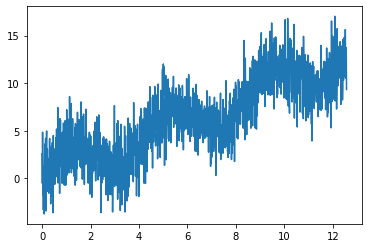

In [45]:
k=2
x = np.arange(0, 4*np.pi, 2*np.pi*k/(1.5*1000))
y = x + 2 * np.sin(1.5*x) 
plt.plot(x, y)
plt.show()
noise = np.random.normal(0, 2, len(y))
plt.plot(x, y + noise)
plt.show()
x=x.reshape(len(x), 1)

## Linear Hypothesis

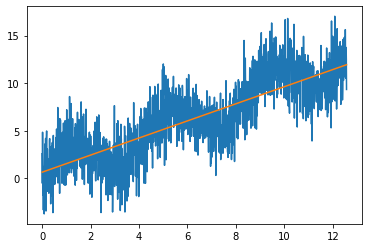

In [57]:
theta = np.random.randn(2, 1)
X0 = np.ones(x.shape[0])
X0 = X0.reshape(x.shape[0], 1)
X = np.hstack((X0, x))

pseudo = X.T.dot(X)
pseudo_inv = np.linalg.pinv(pseudo)
theta = pseudo_inv.dot(X.T).dot(y)

h_linear = X.dot(theta)
plt.plot(x, y + noise)
plt.plot(x, h_linear)
